In [3]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model
import pickle

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier




## References
Kagle: https://www.kaggle.com/code/jonahgiglio2/fork-of-fsgm-defense

In [12]:
for dirname, _, filenames in os.walk(r"D:/CondaEnvs/mjcasptone/MJCasptone/00 Downloads/01 Datasets/Processed Traffic Data for ML Algorithms/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        # /Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
        # /Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
        # /Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
        # /Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
        # /Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
        # /Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
        # /Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
        # /Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv

D:/CondaEnvs/mjcasptone/MJCasptone/00 Downloads/01 Datasets/Processed Traffic Data for ML Algorithms/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
D:/CondaEnvs/mjcasptone/MJCasptone/00 Downloads/01 Datasets/Processed Traffic Data for ML Algorithms/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
D:/CondaEnvs/mjcasptone/MJCasptone/00 Downloads/01 Datasets/Processed Traffic Data for ML Algorithms/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
D:/CondaEnvs/mjcasptone/MJCasptone/00 Downloads/01 Datasets/Processed Traffic Data for ML Algorithms/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
D:/CondaEnvs/mjcasptone/MJCasptone/00 Downloads/01 Datasets/Processed Traffic Data for ML Algorithms/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
D:/CondaEnvs/mjcasptone/MJCasptone/00 Downloads/01 Datasets/Processed Traffic Data for ML Algorithms/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
D:/CondaEnvs/mjcasptone/MJCasptone/00 Downloads/01 Datasets/Processed Traffic Data for ML Algorithms

In [11]:
print(os.path)

<module 'ntpath' from 'd:\\CondaEnvs\\TextMining\\lib\\ntpath.py'>


In [13]:
%%time
# load the data into memory
network_data = pd.read_csv('D:/CondaEnvs/mjcasptone/MJCasptone/00 Downloads/01 Datasets/Processed Traffic Data for ML Algorithms/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')

CPU times: total: 28 s
Wall time: 30.4 s


In [ ]:
# EDA (Exploratory Data Analysis)

In [16]:
# check the shape of data
network_data.shape

(1048575, 80)

In [17]:
#print fist 5 elements
network_data.head(5)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [18]:
# check columns
network_data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [19]:
# data info
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  float64
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

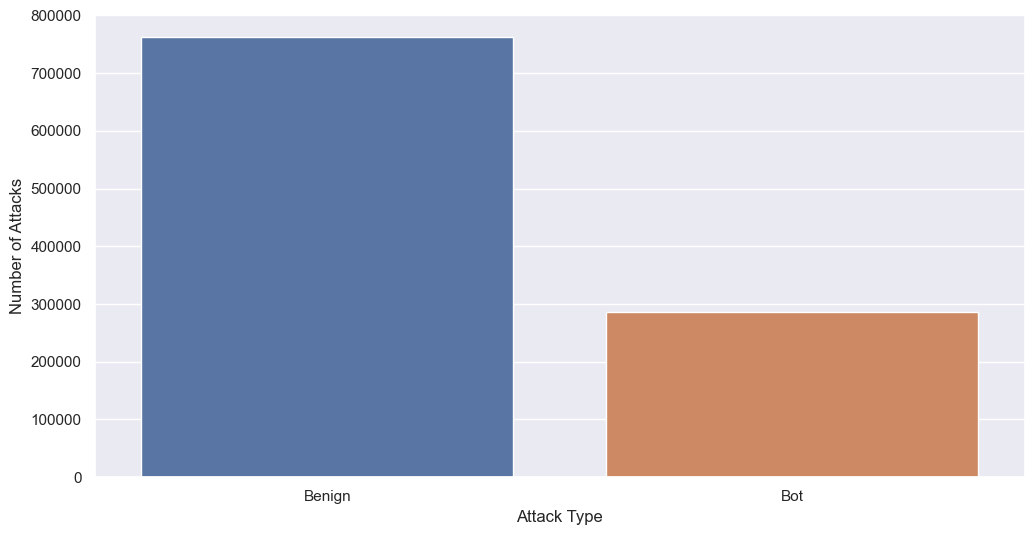

In [20]:
# make a plot number of labels
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(x='Label', data=network_data)
ax.set(xlabel='Attack Type', ylabel='Number of Attacks')
plt.show()